In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import timedelta

In [8]:
df=pd.read_csv("data.csv")
df_o=pd.read_csv("overall.csv")

In [13]:
df.head(10)

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,34,2:0,Solo run,NaN
1,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,90+5,3:0,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:2,NaN,88,1:2,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:1,NaN,67,3:0,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:1,NaN,13,3:0,NaN,NaN
5,03/04,Premier League,11,11/1/03,H,Manchester United,Portsmouth FC,3:0,RW,80,2:0,Direct free kick,NaN
6,03/04,FA Cup,Fifth Round,2/14/04,H,Manchester United,Manchester City,4:2,RW,74,3:0,Right-footed shot,NaN
7,03/04,Premier League,29,3/20/04,H,Manchester United,Tottenham Hotspur,3:0,NaN,89,2:0,Right-footed shot,NaN
8,03/04,Premier League,32,4/10/04,A,Manchester United,Birmingham City,1:2,NaN,60,1:1,Header,Ryan Giggs
9,03/04,Premier League,38,5/15/04,A,Manchester United,Aston Villa,0:2,NaN,4,0:1,Right-footed shot,NaN


In [10]:
df_o.head()

,Matches,Goals,Wiins,Draws,Defeats,Points_average,Game_winning_goals
0,461,698,386,44,31,2.61,219


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 13 columns):
Season              698 non-null object
Competition         698 non-null object
Matchday            698 non-null object
Date                698 non-null object
Venue               698 non-null object
Club                698 non-null object
Opponent            698 non-null object
Result              698 non-null object
Playing_Position    641 non-null object
Minute              698 non-null object
At_score            698 non-null object
Type                683 non-null object
Goal_assist         458 non-null object
dtypes: object(13)
memory usage: 71.0+ KB


In [15]:
pd.DataFrame(df.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])

,Unique Values Count
Season,20
Competition,15
Matchday,52
Date,461
Venue,2
Club,4
Opponent,124
Result,51
Playing_Position,6
Minute,106


In [24]:
df.dtypes

Season              object
Competition         object
Matchday            object
Date                object
Venue               object
Club                object
Opponent            object
Result              object
Playing_Position    object
Minute              object
At_score            object
Type                object
Goal_assist         object
dtype: object

In [18]:
df.describe(include=['object'])

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
count,698,698,698,698,698,698,698,698,641,698,698,683,458
unique,20,15,52,461,2,4,124,51,5,106,35,11,86
top,14/15,LaLiga,Group Stage,4/5/15,H,Real Madrid,Sevilla FC,3:0,LW,90,1:0,Right-footed shot,Karim Benzema
freq,61,311,73,5,402,450,27,49,356,17,111,251,44


In [25]:
pd.DataFrame(df.Competition.value_counts())

,Competition
LaLiga,311
UEFA Champions League,140
Premier League,102
Serie A,81
Copa del Rey,22
FA Cup,13
FIFA Club World Cup,7
Supercopa,4
EFL Cup,4
Italy Cup,4


<AxesSubplot:title={'center':'Goals Per Competition'}, xlabel='Count', ylabel='Competition'>

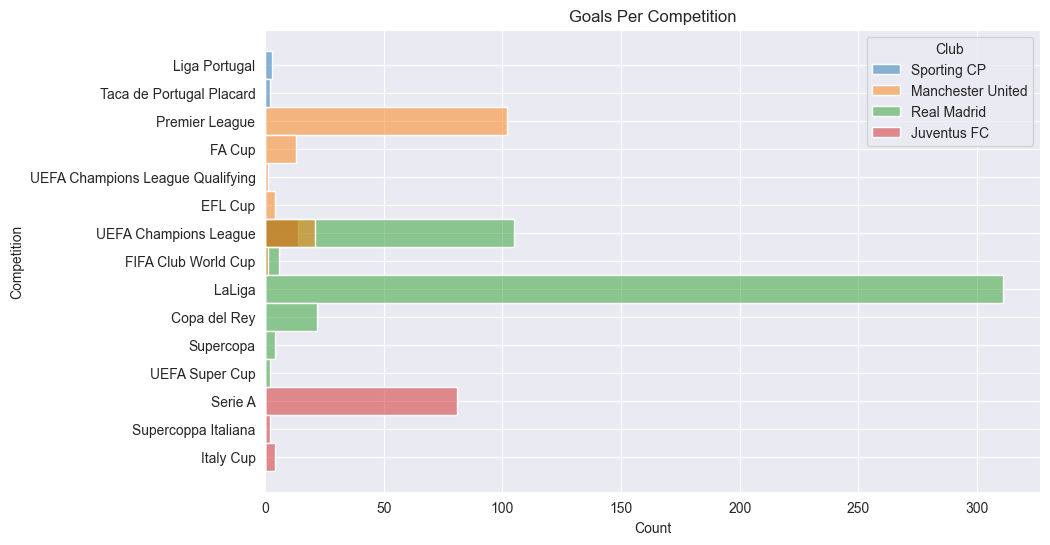

In [69]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Goals Per Competition')
sns.set_style("darkgrid")
sns.histplot(df,y='Competition',hue='Club')
#ax.tick_params(axis='x', labelrotation = 90)

In [65]:
pd.DataFrame(df.Competition.value_counts())

,Competition
LaLiga,311
UEFA Champions League,140
Premier League,102
Serie A,81
Copa del Rey,22
FA Cup,13
FIFA Club World Cup,7
Supercopa,4
EFL Cup,4
Italy Cup,4


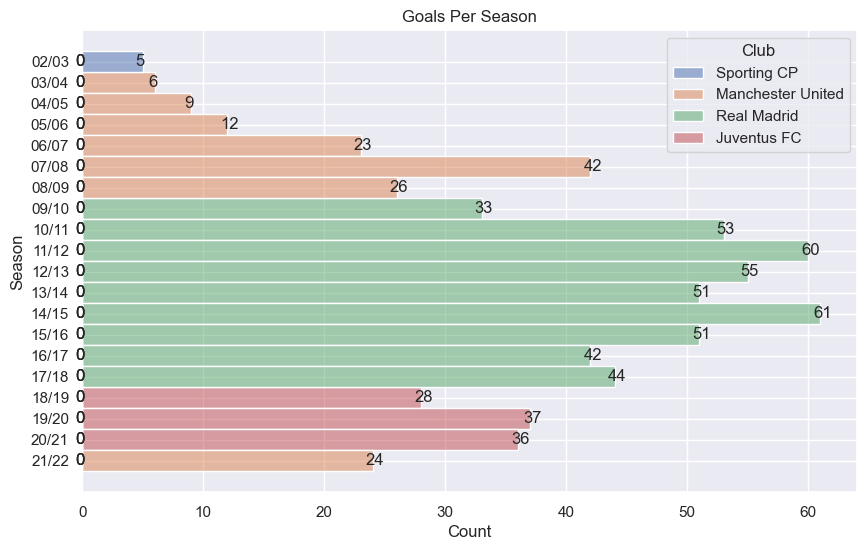

In [177]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.title('Goals Per Season')
sns.set_style("darkgrid")
p =sns.histplot(df,y='Season',hue='Club')
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-5)

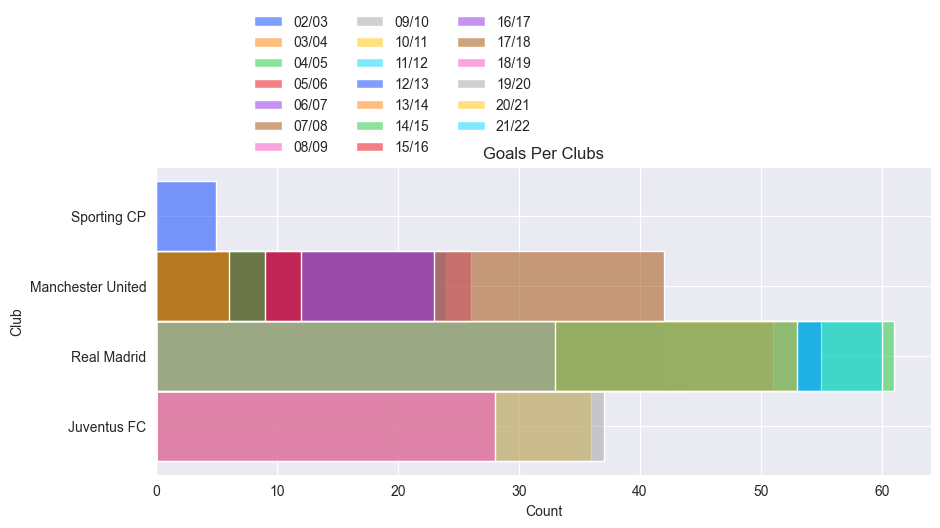

In [103]:
fig, ax = plt.subplots(figsize=(10, 4))
plt.title('Goals Per Clubs')
sns.set_style("darkgrid")
sns.histplot(df,y='Club',hue='Season',palette="bright")
sns.move_legend(
    ax, "lower right",
    bbox_to_anchor=(0.5, 1),
    ncol=3,
    title=None, frameon=False,
)

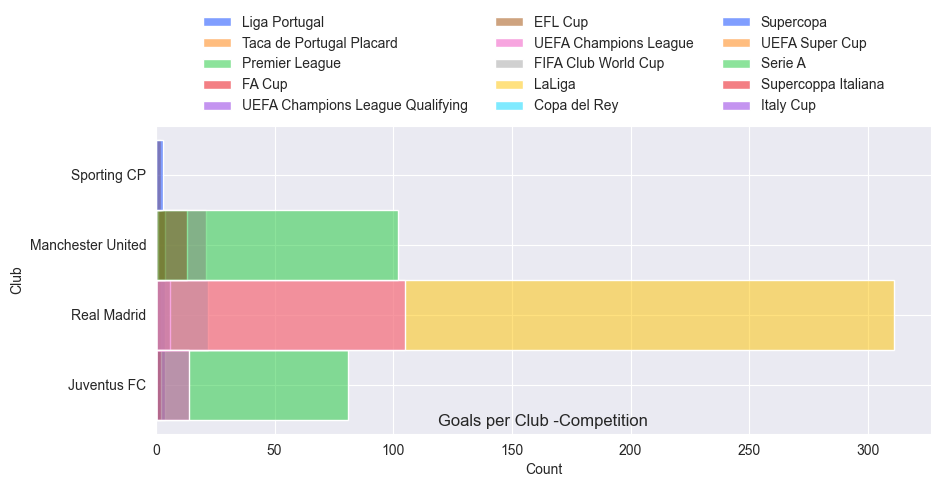

In [112]:
fig, ax = plt.subplots(figsize=(10, 4))
plt.title('Goals per Club -Competition', y=-0.001)
sns.set_style("darkgrid")
sns.histplot(df,y='Club',hue='Competition',palette="bright")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, 1),
    ncol=3,
    title=None, frameon=False,
)

In [115]:
df.Playing_Position.unique()

array(['LW', nan, 'RW', 'CF', 'LW ', 'CF '], dtype=object)

In [121]:
df.loc[(df.Playing_Position =='CF '), 'Playing_Position'] = 'CF'
df.loc[(df.Playing_Position =='LW '), 'Playing_Position'] = 'LW'
df["Playing_Position"].fillna("LW", inplace = True)

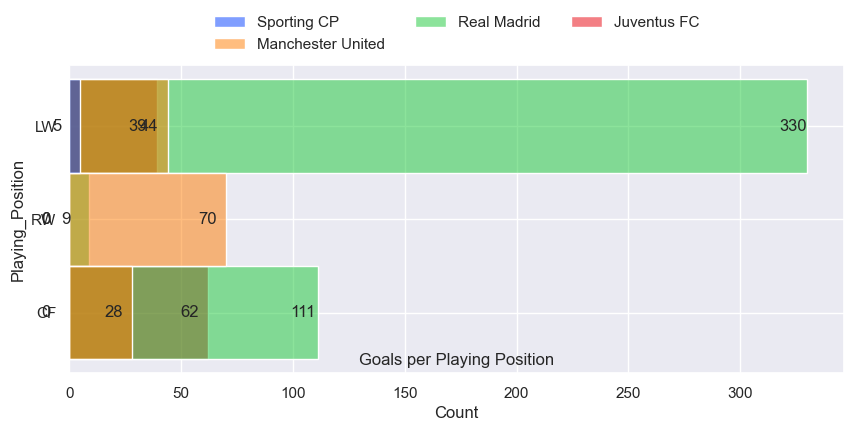

In [172]:
fig, ax = plt.subplots(figsize=(10, 4))
plt.title('Goals per Playing Position', y=-0.001)
sns.set_style("darkgrid")
p =sns.histplot(df,y='Playing_Position',hue='Club',palette="bright")
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, 1),
    ncol=3,
    title=None, frameon=False,
)


In [138]:
mins=list(map(str, range(1,121)))
mins.insert(45,"1stE")
mins.insert(91,"2ndE")
mins.insert(122,"ExtE")
df.loc[df.Minute.str[:3]=='45+', 'Minute'] = '1stE'
df.loc[df.Minute.str[:3]=='90+', 'Minute'] = '2ndE'
df.loc[df.Minute.str[:4]=='120+', 'Minute'] = 'ExtE'
mins1=mins[:46]
mins2=mins[46:92]
mins3 = mins[92:]


C:\Users\sbsam\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


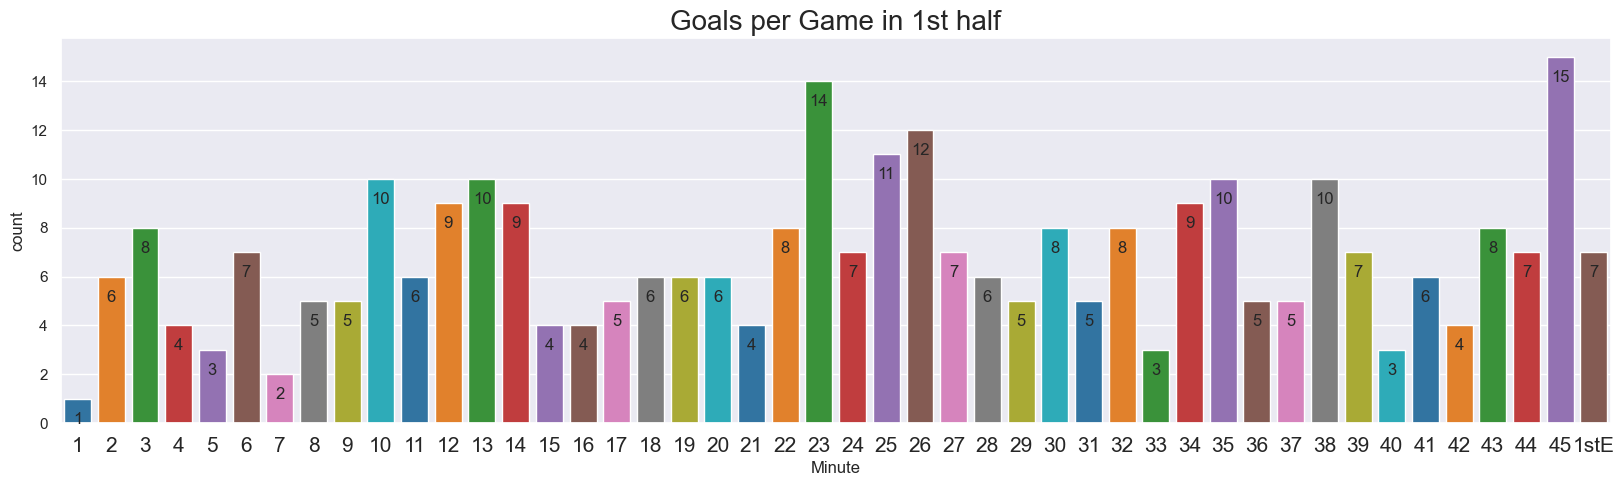

In [169]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15)
sns.set_style("darkgrid")
p=sns.countplot(df['Minute'],order=mins1,palette='tab10')
p.axes.set_title("Goals per Game in 1st half",fontsize=20)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

C:\Users\sbsam\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


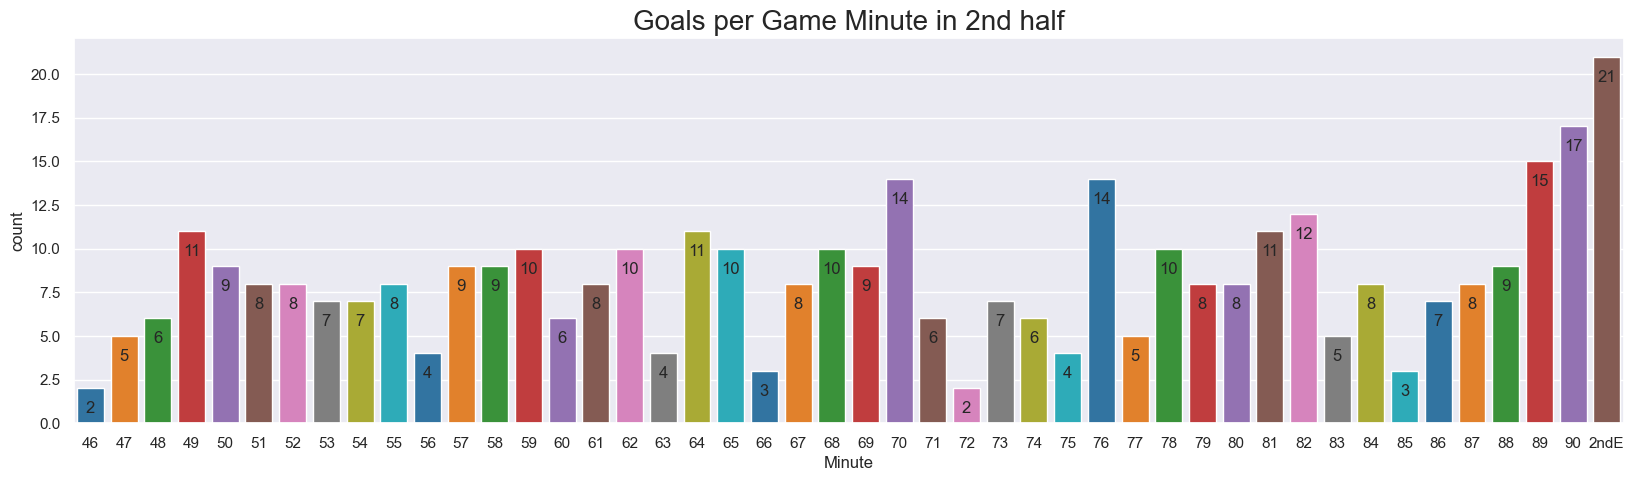

In [170]:
p=sns.countplot(df['Minute'],order=mins2,palette ='tab10')
p.axes.set_title("Goals per Game Minute in 2nd half",fontsize=20)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

C:\Users\sbsam\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


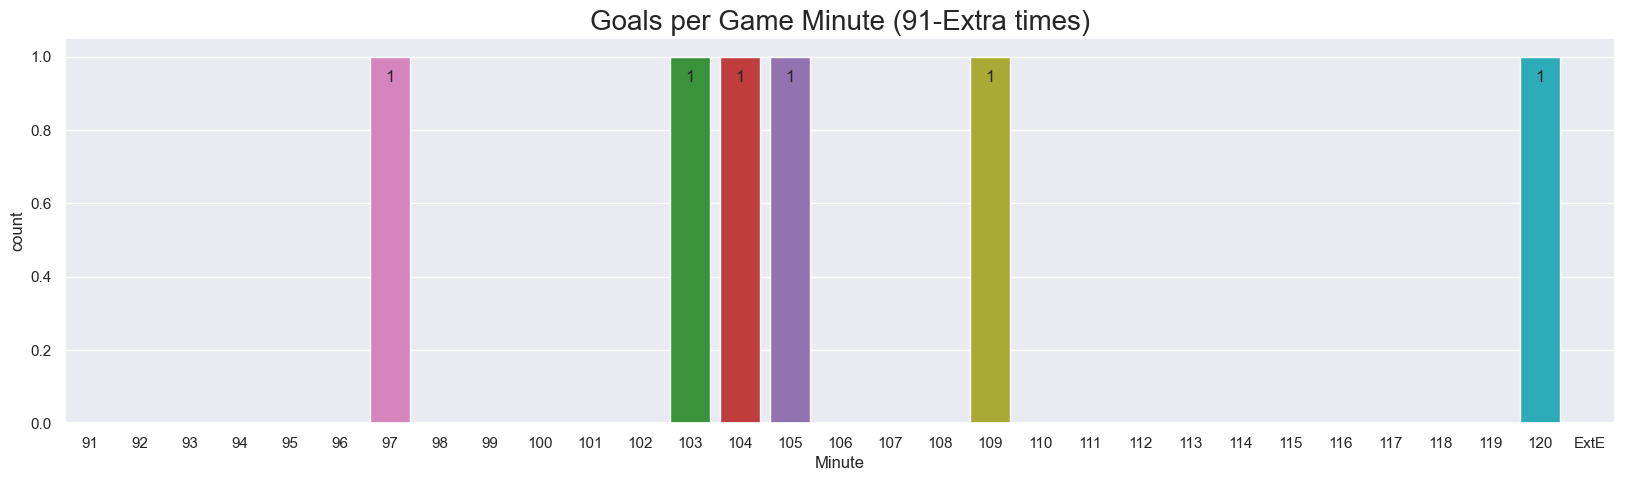

In [171]:
p=sns.countplot(df['Minute'],order=mins3,palette='tab10')
p.axes.set_title("Goals per Game Minute (91-Extra times)",fontsize=20)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

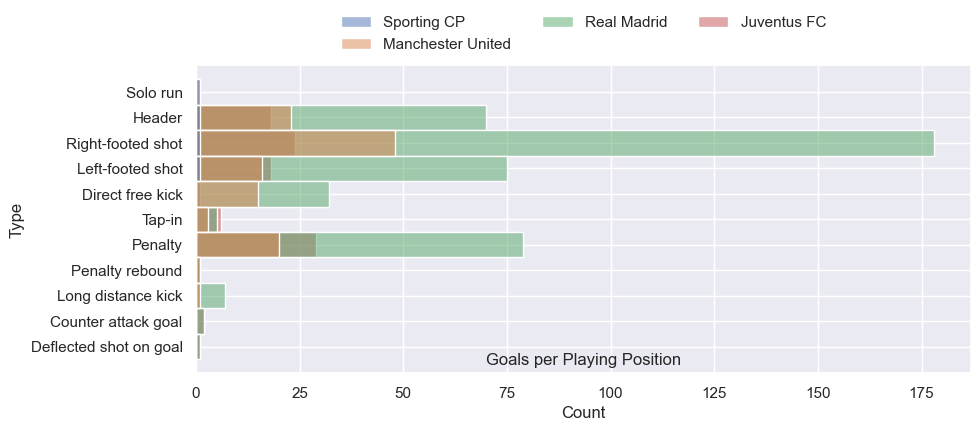

In [165]:
fig, ax = plt.subplots(figsize=(10, 4))
plt.title('Goals per Playing Position', y=-0.001)
sns.histplot(df,y='Type',hue='Club')
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, 1),
    ncol=3,
    title=None, frameon=False,
)

C:\Users\sbsam\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


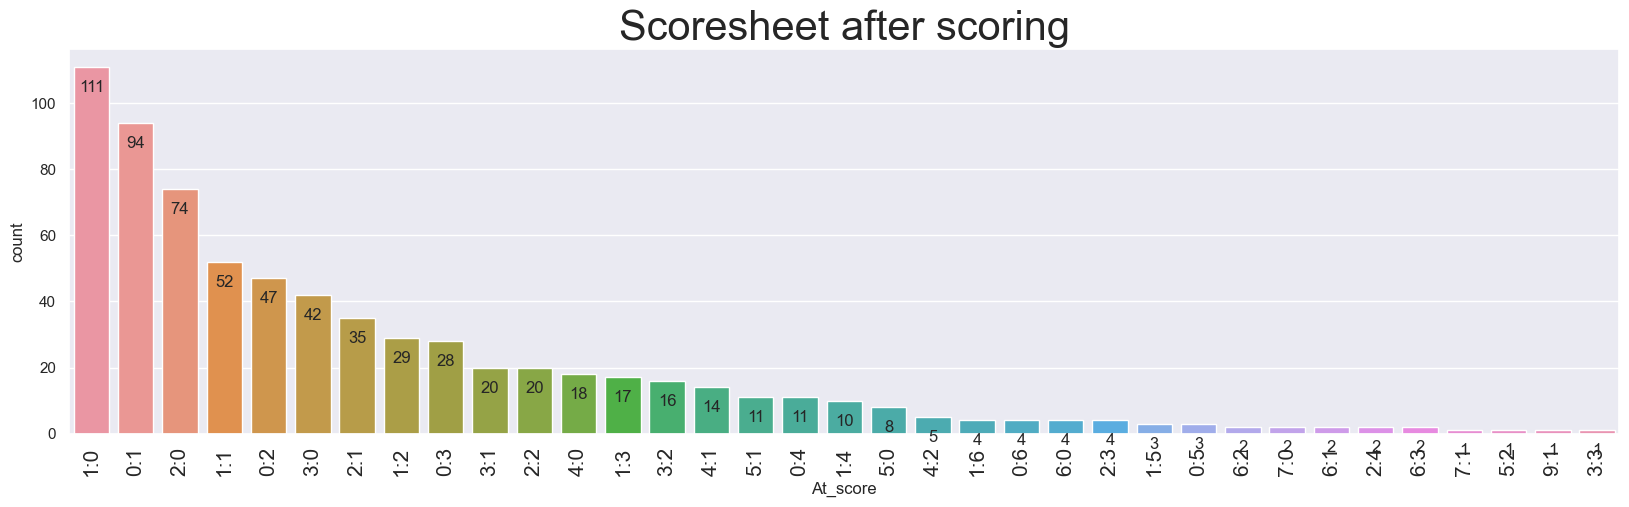

In [167]:
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['At_score'],hue_order=df.groupby('Competition'),order=df.At_score.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Scoresheet after scoring",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

C:\Users\sbsam\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


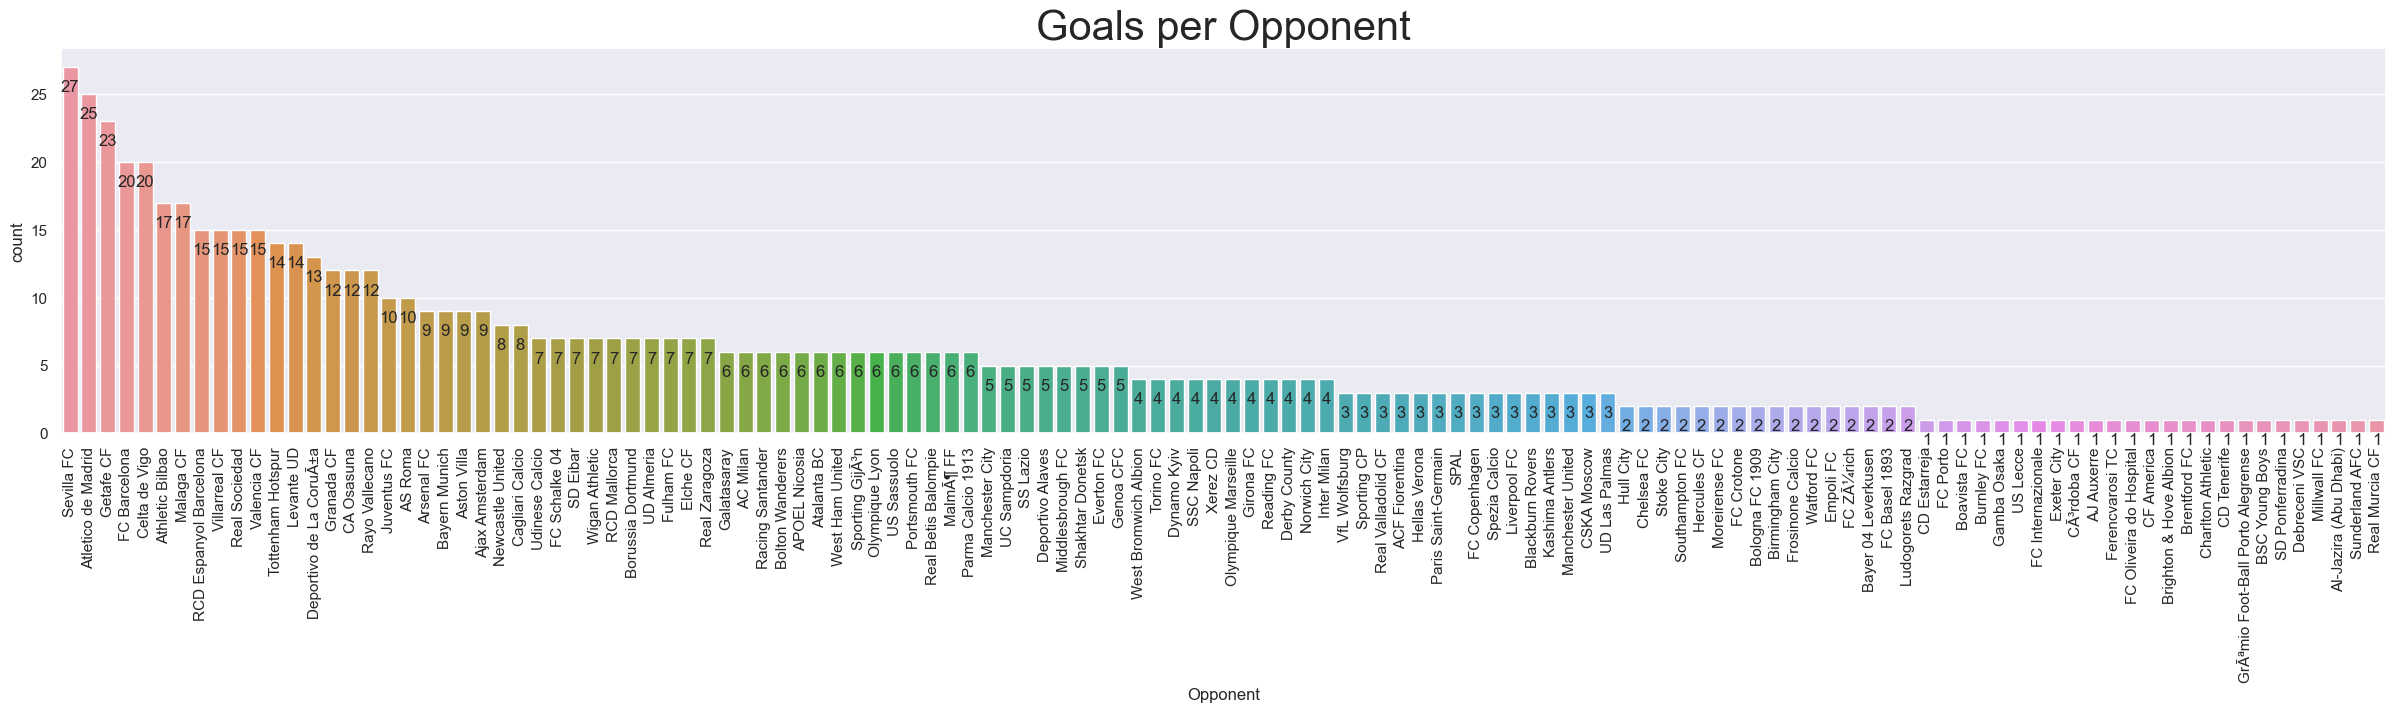

In [168]:
sns.set(rc={'figure.figsize':(30,5)})
plt.xticks(rotation='vertical')
p=sns.countplot(df['Opponent'],hue_order=df.groupby('Competition'),order=df.Opponent.value_counts().sort_values(ascending=False).index)
p.axes.set_title("Goals per Opponent",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)